In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


#import tensorflow

from datetime import datetime

from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

from sklearn.impute import SimpleImputer

from pyod.models.lof import LOF 
from pyod.models.iforest import IForest
from pyod.models.mad import MAD

In [204]:
with open('/Users/jamisonproctor/Desktop/team_ceres/data/saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)

In [205]:
df = pd.DataFrame(columns=['user', 'hr', 'steps', 'hr_mean', 'hr_median', 'hr_std'])
for i, key in enumerate(loaded_dict.keys()):
    df.loc[i, 'user'] = key
    for j, sub_key in enumerate(loaded_dict.keys()):
        df.loc[j, 'hr'] = np.array([loaded_dict[sub_key]['heartrate']])
        df.loc[j, 'steps'] = np.array([loaded_dict[sub_key]['steps']])
        df.loc[j, 'hr_mean'] = round(np.mean(df['hr'][j]), 2)
        df.loc[j, 'hr_median'] = round(np.median(df['hr'][j]), 2)
        df.loc[j, 'hr_std'] = round(np.std(df['hr'][j]), 2)
df.drop(['hr', 'steps'], axis=1, inplace=True)
df

/Users/jamisonproctor/opt/anaconda3/envs/makeathon/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jamisonproctor/opt/anaconda3/envs/makeathon/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/jamisonproctor/opt/anaconda3/envs/makeathon/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/jamisonproctor/opt/anaconda3/envs/makeathon/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/jamisonproctor/opt/anaconda3/envs/makeathon/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encount

,user,hr_mean,hr_median,hr_std
0,APGIB2T,82.54,80.0,10.81
1,A9ZG5GR,68.06,67.0,11.95
2,A0N9NV4,81.63,80.0,14.15
3,AKTGD8X,74.63,70.0,14.68
4,AE2B3RH,87.79,82.0,18.86
...,...,...,...,...
112,A0KX894,76.85,75.0,14.68
113,AOYM4KG,66.48,60.0,17.2
114,AZIK4ZA,72.77,66.0,20.8
115,AWA2KJK,94.74,95.0,15.29


In [214]:
X = df.drop(['user'], axis=1)
kmedoids_pipeline = Pipeline([
        ("imputer", SimpleImputer(missing_values=np.nan, strategy='mean')),
        ("scaler", StandardScaler()),
        ("cluster", KMedoids(n_clusters=10))
        ])
clusters = kmedoids_pipeline.fit_predict(X)
df['medoid_cluster'] = clusters
print(df['medoid_cluster'].value_counts())
df['has_model'] = 0

3    20
9    20
6    17
4    14
8    11
1     9
7     8
0     7
5     6
2     5
Name: medoid_cluster, dtype: int64


In [215]:
models = ['AQC0L71', 'AYWIEKR', 'AS2MVDL', 'AUY8KYW', 'AOYM4KG', 'AYEFCWQ', 'AKXN5ZZ', 'A3OU183', 'AAXAA7Z', 'A1K5DRI', 'A7EM0B6', 'AHYIJDV', 'AIFDJZB', 'AURCTAK', 'AV2GF3B', 'A4E0D03', 'AJWW3IY', 'A4G0044', 'APGIB2T', 'AMV7EQF', 'AA2KP1S', 'AX6281V', 'A0VFT1N', 'ASFODQR', 'A0NVTRV']
for row in df.index:
    if df['user'].loc[row] in models:
        df['has_model'][row] = 1

/var/folders/0r/6jbjzk0n44n_phz8hy1gvsp80000gn/T/ipykernel_50302/2166621620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['has_model'][row] = 1


<AxesSubplot:xlabel='hr_mean', ylabel='hr_std'>

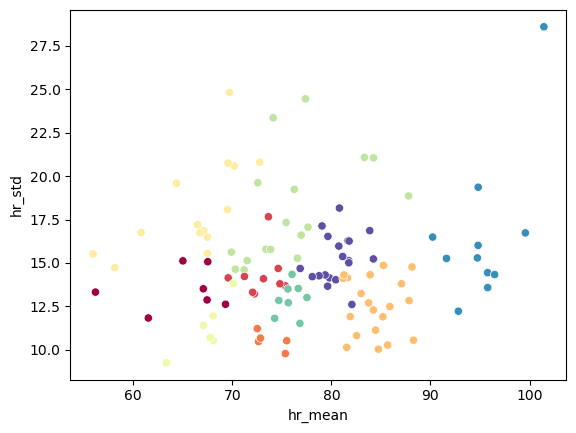

In [216]:
sns.scatterplot(x=df['hr_mean'], y=df['hr_std'], hue=df['medoid_cluster'], palette="Spectral", legend=False)

In [ ]:
#sns.scatterplot(x=df['hr_mean'], y=df['st_mean'], hue=df['has_model'], color = 'r')